In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
from statsmodels.regression.linear_model import OLS

%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/LENOVO/Desktop/ML/markov/winedata.csv")
df.head()

,class,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavonoids,nonflavonid phenols,proanthocyanins,Color intensity,hue,OD280/OD315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


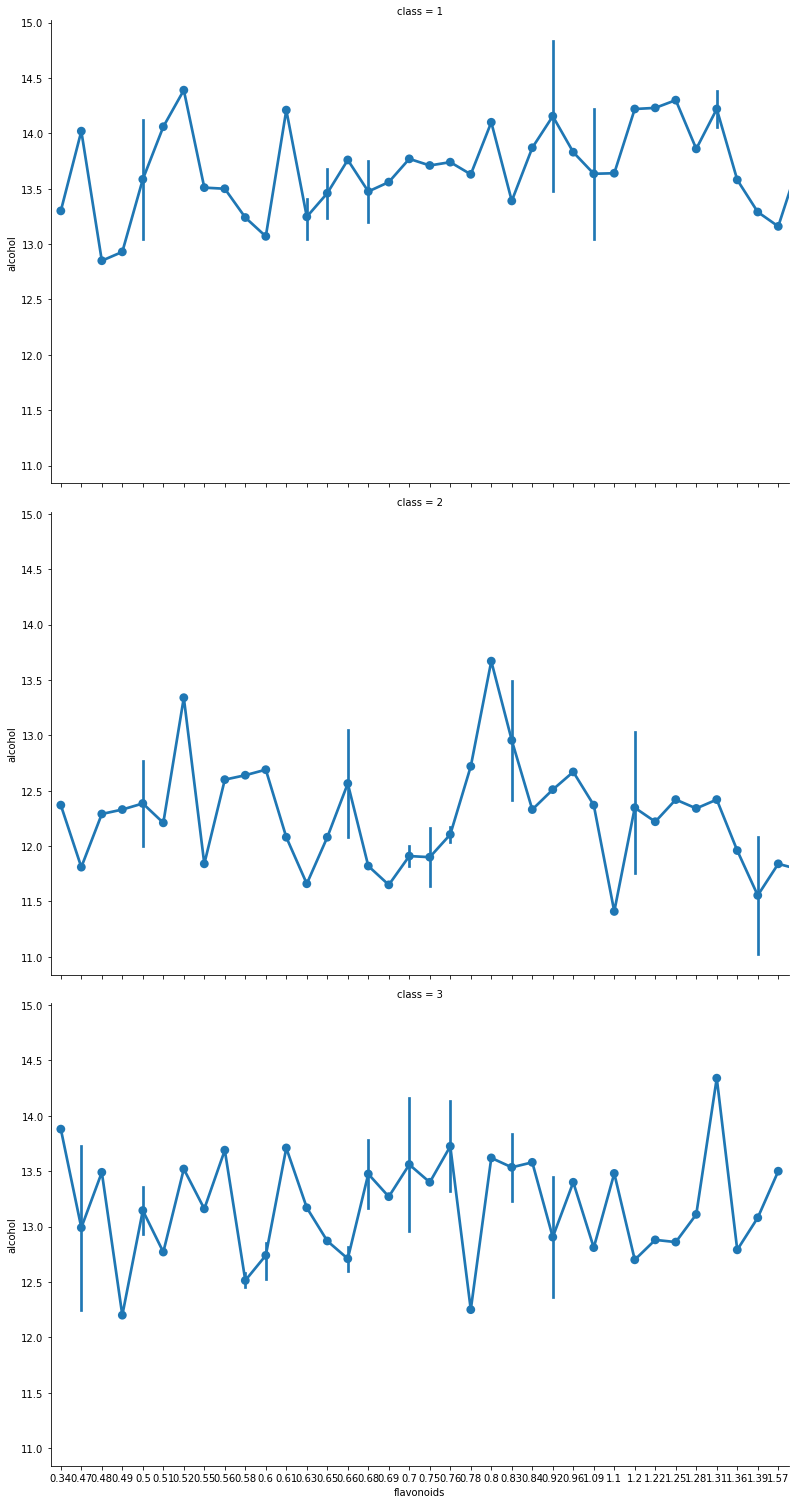

In [3]:
g = sns.FacetGrid(df, row = 'class',size=7, aspect=1.6)
g.map(sns.pointplot , 'flavonoids','alcohol',  alpha=.5, bins = 5)

In [4]:
df = df[['class','alcohol','flavonoids']]

df['stand_alcohol']=StandardScaler().fit_transform(df['alcohol'].values.reshape(-1, 1))
df['stand_flavonoids']=StandardScaler().fit_transform(df['flavonoids'].values.reshape(-1, 1))
df=df[['stand_alcohol','stand_flavonoids', 'class']]

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [5]:
X = df.iloc[:, df.columns != 'class']
Y = df.iloc[:, df.columns == 'class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Text(0.5, 15.0, 'Predicted label')

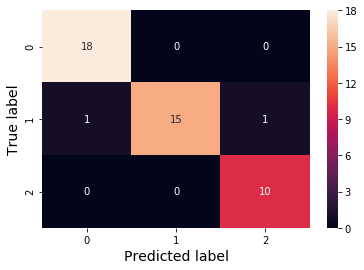

In [6]:
LR = LogisticRegression( penalty = 'l2') 

LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

cnfmtrx = confusion_matrix(y_test, y_pred)

sns.heatmap(cnfmtrx, annot=True, fmt="d")
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)



In [7]:
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(y_test, y_pred, normalize = True))

from sklearn.metrics import precision_score
print("Precision score: ", precision_score(y_test, y_pred, average = "micro"))


Accuracy score:  0.9555555555555556
Precision score:  0.9555555555555556


$$ -3.4342353470856977 3.2597715200031785 -2.695970526627412 4.062831737252596


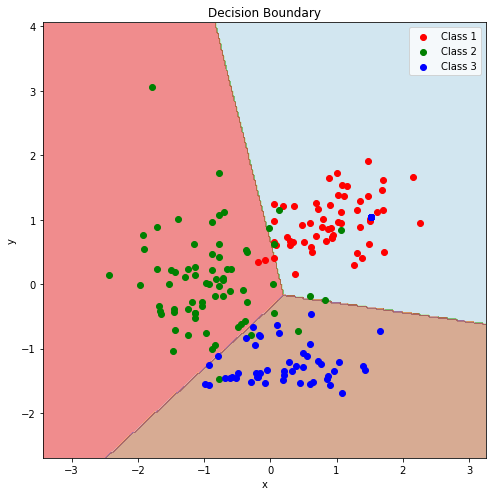

In [8]:
# Plot the decision boundaries
plot_colors = "rgb"
plot_step = 0.02
class_names = "123"
cmap = plt.get_cmap('Paired')

fig = plt.figure(figsize=(7, 7))
fig.patch.set_alpha(0)

x_min, x_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
y_min, y_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

print("$$" , x_min, x_max, y_min, y_max)

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(3), class_names, plot_colors):
    idx = np.where(Y == i+1)
    plt.scatter(X.values[idx, 0], X.values[idx, 1],
                c=c, cmap=cmap,
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

plt.tight_layout()
plt.show()

In [9]:
import tensorflow as tf
import keras

Using TensorFlow backend.
